# Data

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
C# Load data
beans = pd.read_csv("beans.csv")
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
X = beans.drop("Class", axis = 1)
y = beans.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 546)

# Creating a Basic Decision Tree

[Text(0.5, 0.9, 'MajorAxisLength <= 280.633\ngini = 0.828\nsamples = 8166\nvalue = [799, 320, 980, 2099, 1186, 1195, 1587]'),
 Text(0.25, 0.7, 'ShapeFactor1 <= 0.007\ngini = 0.538\nsamples = 3387\nvalue = [1, 0, 1, 2002, 9, 1102, 272]'),
 Text(0.125, 0.5, 'ShapeFactor3 <= 0.727\ngini = 0.224\nsamples = 1191\nvalue = [1, 0, 1, 64, 1, 1044, 80]'),
 Text(0.0625, 0.3, 'Perimeter <= 747.064\ngini = 0.593\nsamples = 134\nvalue = [0, 0, 0, 42, 1, 19, 72]'),
 Text(0.03125, 0.1, 'gini = 0.597\nsamples = 52\nvalue = [0, 0, 0, 28, 0, 9, 15]'),
 Text(0.09375, 0.1, 'gini = 0.473\nsamples = 82\nvalue = [0, 0, 0, 14, 1, 10, 57]'),
 Text(0.1875, 0.3, 'ShapeFactor3 <= 0.753\ngini = 0.059\nsamples = 1057\nvalue = [1, 0, 1, 22, 0, 1025, 8]'),
 Text(0.15625, 0.1, 'gini = 0.414\nsamples = 81\nvalue = [0, 0, 0, 14, 0, 60, 7]'),
 Text(0.21875, 0.1, 'gini = 0.022\nsamples = 976\nvalue = [1, 0, 1, 8, 0, 965, 1]'),
 Text(0.375, 0.5, 'Perimeter <= 711.719\ngini = 0.213\nsamples = 2196\nvalue = [0, 0, 0, 1938, 8,

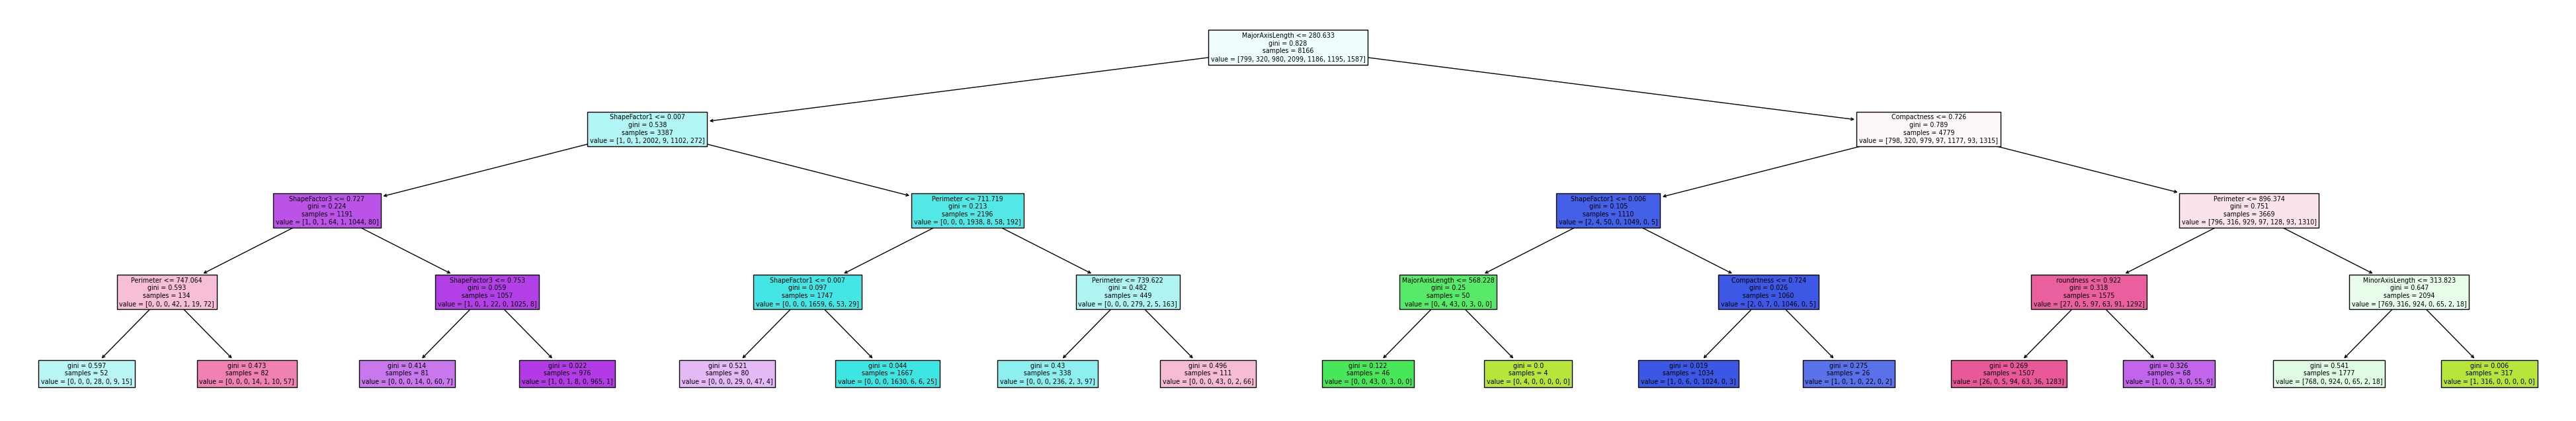

In [ ]:
# Create and fit decision tree
to_plot = DecisionTreeClassifier(max_depth = 4)
to_plot.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize = (50,8))
plot_tree(to_plot, filled = True, feature_names = X.columns.values)

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.90      0.92      0.91       650
    DERMASON       0.89      0.89      0.89      1447
       HOROZ       0.93      0.91      0.92       742
       SEKER       0.90      0.93      0.92       832
        SIRA       0.83      0.81      0.82      1049

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445



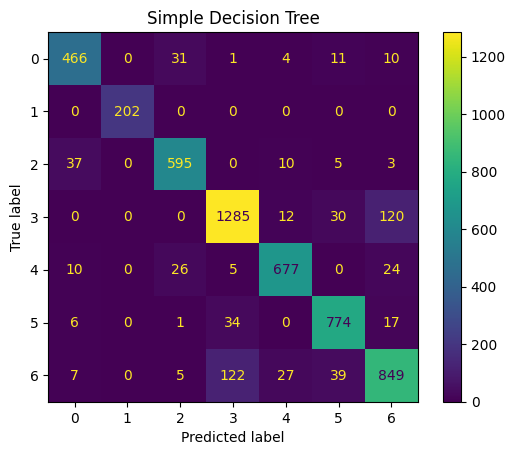

In [ ]:
simple = DecisionTreeClassifier(random_state = 546)
simple.fit(X_train, y_train)

y_pred_simple = simple.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_simple)).plot()
plt.title("Simple Decision Tree")
print(classification_report(y_test, y_pred_simple))

# Pruning

In [ ]:
# Obtain pruning path
path = simple.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
trees = []

# Test various levels of alpha
# This takes about a minute, there are over 300 alpha values to train for
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 546, ccp_alpha = ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

<ipython-input-54-4b1308c77ad2>:4: RuntimeWarning: divide by zero encountered in log10
  log_ccp_alphas = np.log10(ccp_alphas)


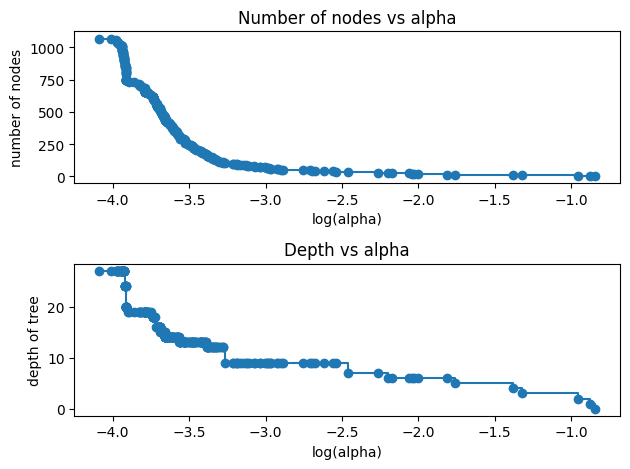

In [ ]:
# Plot alpha vs nodes, depth
# We are using a logarithmnic scale for alpha because if we didnt, a lot of the
# values would be squished to the left size of the graph
log_ccp_alphas = np.log10(ccp_alphas)
fig, ax = plt.subplots(2, 1)

node_counts = [tree.tree_.node_count for tree in trees]
ax[0].plot(log_ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("log(alpha)")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

depth = [tree.tree_.max_depth for tree in trees]
ax[1].plot(log_ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("log(alpha)")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()

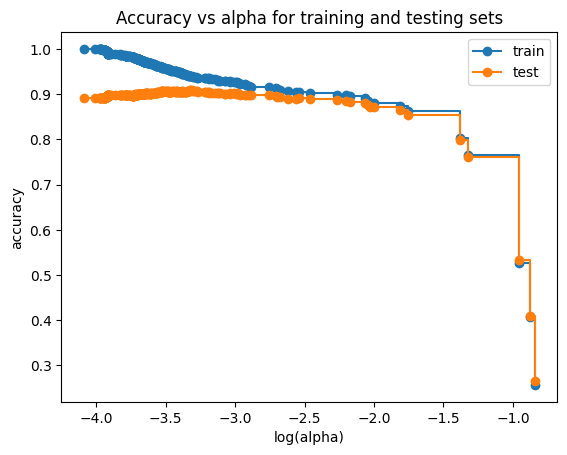

In [ ]:
# Plot alpha vs performance
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("log(alpha)")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(log_ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(log_ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Bagging

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.90      0.92      0.91       650
    DERMASON       0.89      0.89      0.89      1447
       HOROZ       0.93      0.91      0.92       742
       SEKER       0.90      0.93      0.92       832
        SIRA       0.83      0.81      0.82      1049

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.90      0.91       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.92      0.94      0.93       650
    DERMASON       0.89      0.93      0.91      1447
       HOROZ       0.96      0.94      0.95       742
       SEKER       0.94      0.94      0.94       832
        SIRA       0.87 

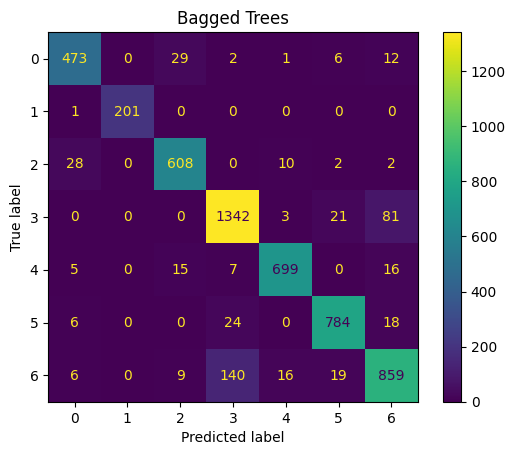

In [ ]:
bagging = BaggingClassifier(random_state = 546) # Defaults to 10 trees
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_bagging)).plot()
plt.title("Bagged Trees")
print(classification_report(y_test, y_pred_simple)) # For comparison
print(classification_report(y_test, y_pred_bagging))

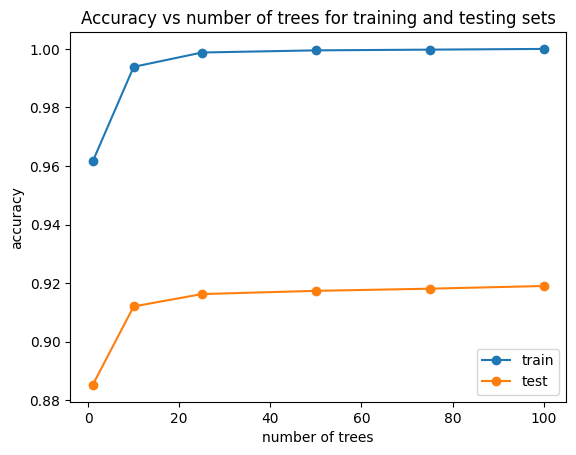

In [ ]:
# Vary number of trees
n_trees = [1, 10, 25, 50, 75, 100]
bag_train_scores = []
bag_test_scores = []

# Takes around half a minute
for n in n_trees:
    bag = BaggingClassifier(n_estimators = n, random_state = 546)
    bag.fit(X_train, y_train)
    bag_train_scores.append(bag.score(X_train, y_train))
    bag_test_scores.append(bag.score(X_test, y_test))

# Plot performances
fig, ax = plt.subplots()
ax.set_xlabel("number of trees")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs number of trees for training and testing sets")
ax.plot(n_trees, bag_train_scores, marker="o", label="train")
ax.plot(n_trees, bag_test_scores, marker="o", label="test")
ax.legend()
plt.show()

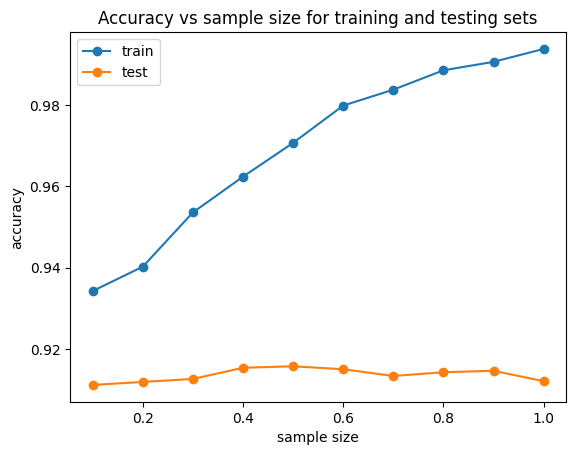

In [ ]:
# Vary size of bootstrap sample
sample_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bag_train_scores = []
bag_test_scores = []

for size in sample_size:
    bag = BaggingClassifier(max_samples = size, random_state = 546)
    bag.fit(X_train, y_train)
    bag_train_scores.append(bag.score(X_train, y_train))
    bag_test_scores.append(bag.score(X_test, y_test))

# Plot performances
fig, ax = plt.subplots()
ax.set_xlabel("sample size")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs sample size for training and testing sets")
ax.plot(sample_size, bag_train_scores, marker="o", label="train")
ax.plot(sample_size, bag_test_scores, marker="o", label="test")
ax.legend()
plt.show()

# Random Subspace

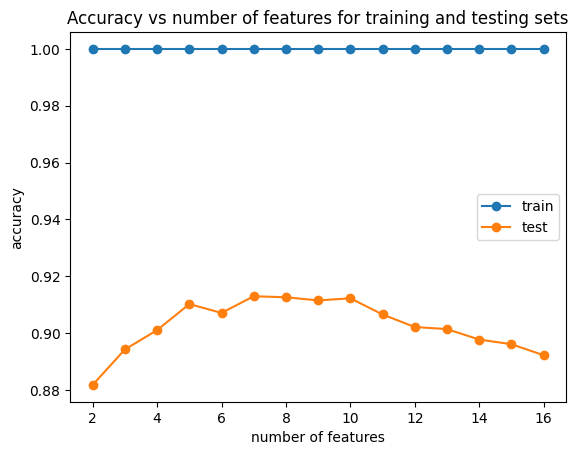

In [ ]:
# Vary number of features
n_features = range(2,17)
bag_train_scores = []
bag_test_scores = []

for n in n_features:
    bag = BaggingClassifier(max_features = n, bootstrap = False, random_state = 546)
    bag.fit(X_train, y_train)
    bag_train_scores.append(bag.score(X_train, y_train))
    bag_test_scores.append(bag.score(X_test, y_test))

# Plot performances
fig, ax = plt.subplots()
ax.set_xlabel("number of features")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs number of features for training and testing sets")
ax.plot(n_features, bag_train_scores, marker="o", label="train")
ax.plot(n_features, bag_test_scores, marker="o", label="test")
ax.legend()
plt.show()

# Random Forest

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.90      0.92      0.91       650
    DERMASON       0.89      0.89      0.89      1447
       HOROZ       0.93      0.91      0.92       742
       SEKER       0.90      0.93      0.92       832
        SIRA       0.83      0.81      0.82      1049

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.92      0.94      0.93       650
    DERMASON       0.90      0.93      0.91      1447
       HOROZ       0.96      0.94      0.95       742
       SEKER       0.95      0.94      0.95       832
        SIRA       0.87 

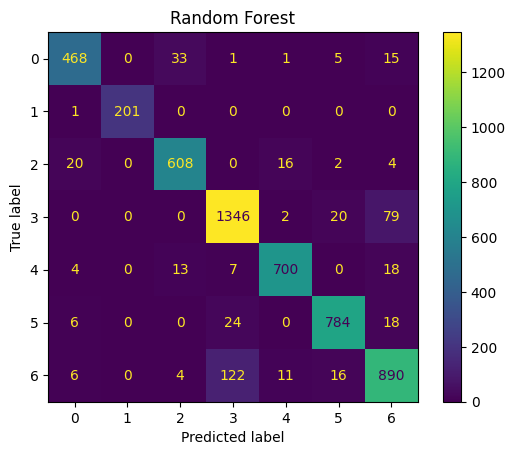

In [ ]:
forest = RandomForestClassifier(random_state = 546) # Defaults to 100 trees, sqrt of number of features
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_forest)).plot()
plt.title("Random Forest")
print(classification_report(y_test, y_pred_simple)) # For comparison
print(classification_report(y_test, y_pred_forest))

# Boosting

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.90      0.92      0.91       650
    DERMASON       0.89      0.89      0.89      1447
       HOROZ       0.93      0.91      0.92       742
       SEKER       0.90      0.93      0.92       832
        SIRA       0.83      0.81      0.82      1049

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       523
      BOMBAY       1.00      1.00      1.00       202
        CALI       0.93      0.94      0.94       650
    DERMASON       0.90      0.93      0.91      1447
       HOROZ       0.95      0.94      0.95       742
       SEKER       0.95      0.94      0.95       832
        SIRA       0.88 

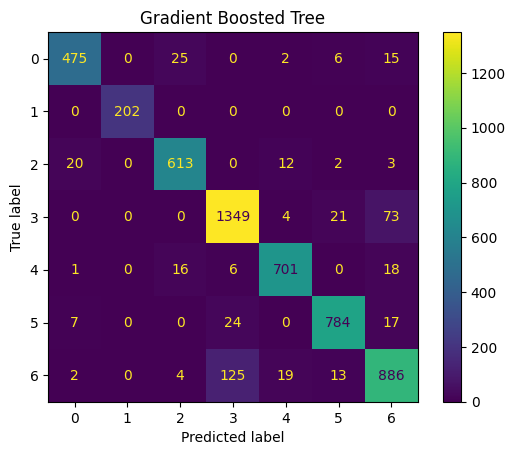

In [ ]:
boost = GradientBoostingClassifier(random_state = 546)
boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_boost)).plot()
plt.title("Gradient Boosted Tree")
print(classification_report(y_test, y_pred_simple)) # For comparison
print(classification_report(y_test, y_pred_boost))

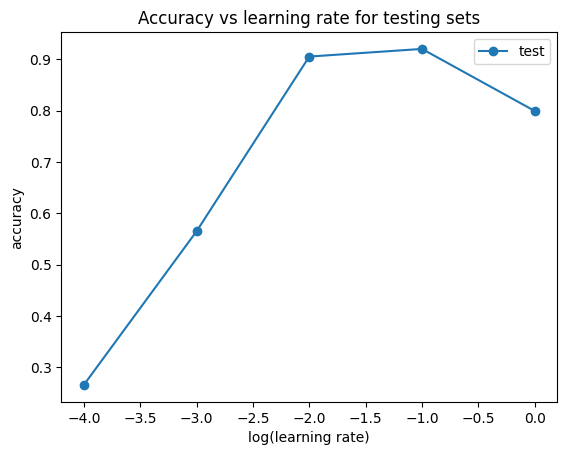

In [ ]:
# Vary learning rate
learning_rate = range(-4, 1)
bag_test_scores = []

# Takes around 3 minutes
for rate in learning_rate:
    bag = GradientBoostingClassifier(learning_rate = 10 ** rate, random_state = 546)
    bag.fit(X_train, y_train)
    bag_test_scores.append(bag.score(X_test, y_test))

# Plot performances
fig, ax = plt.subplots()
ax.set_xlabel("log(learning rate)")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs learning rate for testing sets")
ax.plot(learning_rate, bag_test_scores, marker="o", label="test")
ax.legend()
plt.show()